In [107]:
# Importing the required packages
import warnings
warnings.filterwarnings('ignore')
import sys
import os
import time

import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [108]:
# Importing the CSV file
b_cancer = pd.read_csv('data.csv')

In [109]:
# Checking the number of rows and columns
b_cancer.shape

(569, 33)

In [110]:
# Checking the table information
b_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [111]:
# Checking the values for different quantiles
b_cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [112]:
# Checking the column present
b_cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [113]:
# Checking the random data
b_cancer.head()
b_cancer.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [114]:
# Dropping the upwanted columns
#loans_df.dropna(axis=1,how='all')
b_cancer = b_cancer.drop(['id','Unnamed: 32'],axis = 1)
#b_cancer.head()

In [115]:
# def remove_outliers(df):
#     df_new = []
#     for i in df.columns:
#         Q1 = pd.DataFrame(df[i]).quantile(0.25)
#         Q3 = pd.DataFrame(df[i]).quantile(0.75)
#         IQR = Q3 - Q1
#         df_new = pd.DataFrame(df[(pd.DataFrame(df[i]) >= Q1 - 1.5*IQR) & (pd.DataFrame(df[i]) <= Q3 + 1.5*IQR)])
#     return pd.DataFrame(df_new)

In [116]:
# Checking for the outliers for the metric columns
b_cancer[['radius_mean','texture_mean', 'perimeter_mean', 'area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean']].describe([0.25,0.50,0.75,0.99])

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700
99%,24.371600,30.652000,165.724000,1786.600000,0.132888,0.277192,0.351688,0.164208,0.259564
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000


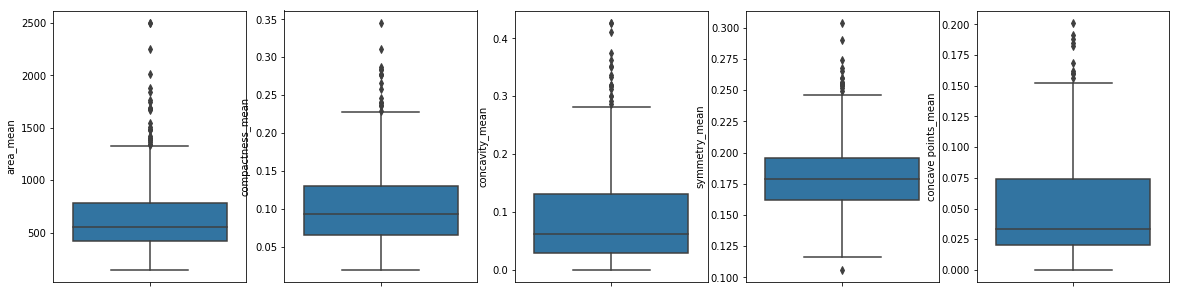

In [117]:
# Removing outliers
plt.figure(figsize=(20,5))
plt.subplot(1,5,1)
sns.boxplot(y = b_cancer.area_mean)

plt.subplot(1,5,2)
sns.boxplot(y = b_cancer.compactness_mean)

plt.subplot(1,5,3)
sns.boxplot(y = b_cancer.concavity_mean)

plt.subplot(1,5,4)
sns.boxplot(y = b_cancer.symmetry_mean)

plt.subplot(1,5,5)
sns.boxplot(y = b_cancer['concave points_mean'])

In [118]:
# Removing Outliers
Q1 = b_cancer.area_mean.quantile(0.25)
Q3 = b_cancer.area_mean.quantile(0.75)
IQR = Q3 - Q1
b_cancer = b_cancer[(b_cancer.area_mean >= Q1 - 1.5*IQR) & (b_cancer.area_mean <= Q3 + 1.5*IQR)]


Q1 = b_cancer.compactness_mean.quantile(0.25)
Q3 = b_cancer.compactness_mean.quantile(0.75)
IQR = Q3 - Q1
b_cancer = b_cancer[(b_cancer.compactness_mean >= Q1 - 1.5*IQR) & (b_cancer.compactness_mean <= Q3 + 1.5*IQR)]


Q1 = b_cancer.concavity_mean.quantile(0.25)
Q3 = b_cancer.concavity_mean.quantile(0.75)
IQR = Q3 - Q1
b_cancer = b_cancer[(b_cancer.concavity_mean >= Q1 - 1.5*IQR) & (b_cancer.concavity_mean <= Q3 + 1.5*IQR)]

Q1 = b_cancer.symmetry_mean.quantile(0.25)
Q3 = b_cancer.symmetry_mean.quantile(0.75)
IQR = Q3 - Q1
b_cancer = b_cancer[(b_cancer.symmetry_mean >= Q1 - 1.5*IQR) & (b_cancer.symmetry_mean <= Q3 + 1.5*IQR)]


Q1 = b_cancer['concave points_mean'].quantile(0.25)
Q3 = b_cancer['concave points_mean'].quantile(0.75)
IQR = Q3 - Q1
b_cancer = b_cancer[(b_cancer['concave points_mean'] >= Q1 - 1.5*IQR) & (b_cancer['concave points_mean'] <= Q3 + 1.5*IQR)]

In [119]:
b_cancer.shape

(506, 31)

In [120]:
b_cancer[['fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se']].describe([0.25,0.50,0.75,0.99])

,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.062268,0.357170,1.195564,2.505993,32.341933,0.006998,0.023053,0.027838,0.010967,0.019849
std,0.006479,0.195444,0.531670,1.345565,25.208225,0.002976,0.015144,0.020570,0.005332,0.007011
min,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882
25%,0.057645,0.224175,0.825300,1.554250,17.287500,0.005105,0.012493,0.014147,0.007332,0.014958
50%,0.061295,0.302050,1.082000,2.155000,22.960000,0.006296,0.018795,0.023270,0.010370,0.018500
75%,0.065550,0.424025,1.464250,3.006500,36.550000,0.008107,0.030390,0.037365,0.013695,0.022760
99%,0.082537,0.999055,2.833050,7.233050,119.095000,0.017151,0.076344,0.099481,0.027928,0.042404
max,0.095750,1.370000,4.885000,9.424000,176.500000,0.031130,0.106400,0.153500,0.039270,0.061460


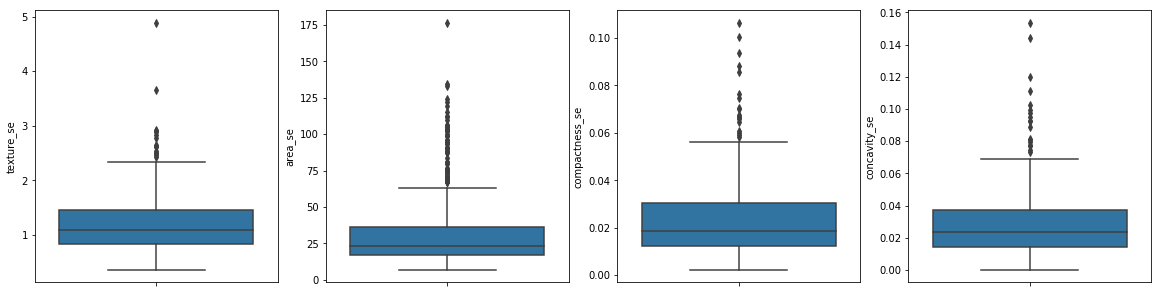

In [121]:
# Removing  outliers
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
sns.boxplot(y = b_cancer.texture_se)

plt.subplot(1,4,2)
sns.boxplot(y = b_cancer.area_se)

plt.subplot(1,4,3)
sns.boxplot(y = b_cancer.compactness_se)

plt.subplot(1,4,4)
sns.boxplot(y = b_cancer.concavity_se)



In [122]:
# Removing Outliers
Q1 = b_cancer.texture_se.quantile(0.25)
Q3 = b_cancer.texture_se.quantile(0.75)
IQR = Q3 - Q1
b_cancer = b_cancer[(b_cancer.texture_se >= Q1 - 1.5*IQR) & (b_cancer.texture_se <= Q3 + 1.5*IQR)]


Q1 = b_cancer.area_se.quantile(0.25)
Q3 = b_cancer.area_se.quantile(0.75)
IQR = Q3 - Q1
b_cancer = b_cancer[(b_cancer.area_se >= Q1 - 1.5*IQR) & (b_cancer.area_se <= Q3 + 1.5*IQR)]


Q1 = b_cancer.compactness_se.quantile(0.25)
Q3 = b_cancer.compactness_se.quantile(0.75)
IQR = Q3 - Q1
b_cancer = b_cancer[(b_cancer.compactness_se >= Q1 - 1.5*IQR) & (b_cancer.compactness_se <= Q3 + 1.5*IQR)]

Q1 = b_cancer.concavity_se.quantile(0.25)
Q3 = b_cancer.concavity_se.quantile(0.75)
IQR = Q3 - Q1
b_cancer = b_cancer[(b_cancer.concavity_se >= Q1 - 1.5*IQR) & (b_cancer.concavity_se <= Q3 + 1.5*IQR)]

In [123]:
# Checking the numbers of rows after removing outliers
b_cancer.shape

(409, 31)

In [124]:
# Describing again to check the effect after outliers removal
b_cancer[['fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst']].describe([0.25,0.50,0.75,0.99])

,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst
count,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000
mean,0.003131,14.679198,24.857188,95.899291,683.994377,0.130680,0.214945,0.206591,0.094234
std,0.001536,2.921243,6.025439,20.083581,281.430871,0.022766,0.122807,0.150324,0.051336
min,0.000895,7.930000,12.020000,50.410000,185.200000,0.081250,0.034320,0.000000,0.000000
25%,0.002060,12.830000,20.350000,82.740000,496.700000,0.114200,0.126600,0.093850,0.058900
50%,0.002768,14.230000,24.490000,92.150000,622.900000,0.129700,0.184500,0.175900,0.083880
75%,0.003806,16.310000,28.680000,107.400000,809.700000,0.143200,0.269800,0.296200,0.125100
99%,0.008289,23.321600,41.524400,152.860000,1621.640000,0.190048,0.580168,0.637272,0.224104
max,0.011480,24.560000,49.540000,166.400000,1844.000000,0.222600,0.937900,0.840200,0.270100


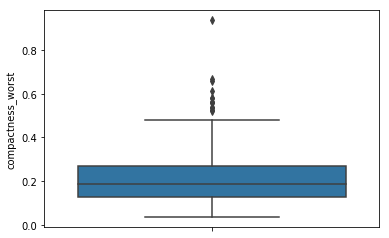

In [125]:
sns.boxplot(y = b_cancer.compactness_worst)

In [126]:
Q1 = b_cancer.compactness_worst.quantile(0.25)
Q3 = b_cancer.compactness_worst.quantile(0.75)
IQR = Q3 - Q1

b_cancer = b_cancer[(b_cancer.compactness_worst >= Q1 - 1.5*IQR) & (b_cancer.compactness_worst<=Q3 + 1.5*IQR)]

In [127]:
b_cancer.shape

(396, 31)

In [128]:
b_cancer[['symmetry_worst', 'fractal_dimension_worst']].describe([0.99])

,symmetry_worst,fractal_dimension_worst
count,396.000000,396.000000
mean,0.280162,0.080011
std,0.047374,0.013325
min,0.178300,0.055210
50%,0.275750,0.078050
99%,0.467935,0.118410
max,0.488200,0.140500


In [129]:
df_cancer = b_cancer

In [130]:
# Replacing the dependent variable with binary value for prediction
df_cancer.diagnosis = df_cancer.diagnosis.map({'M':1,'B':0})

<Figure size 720x720 with 0 Axes>

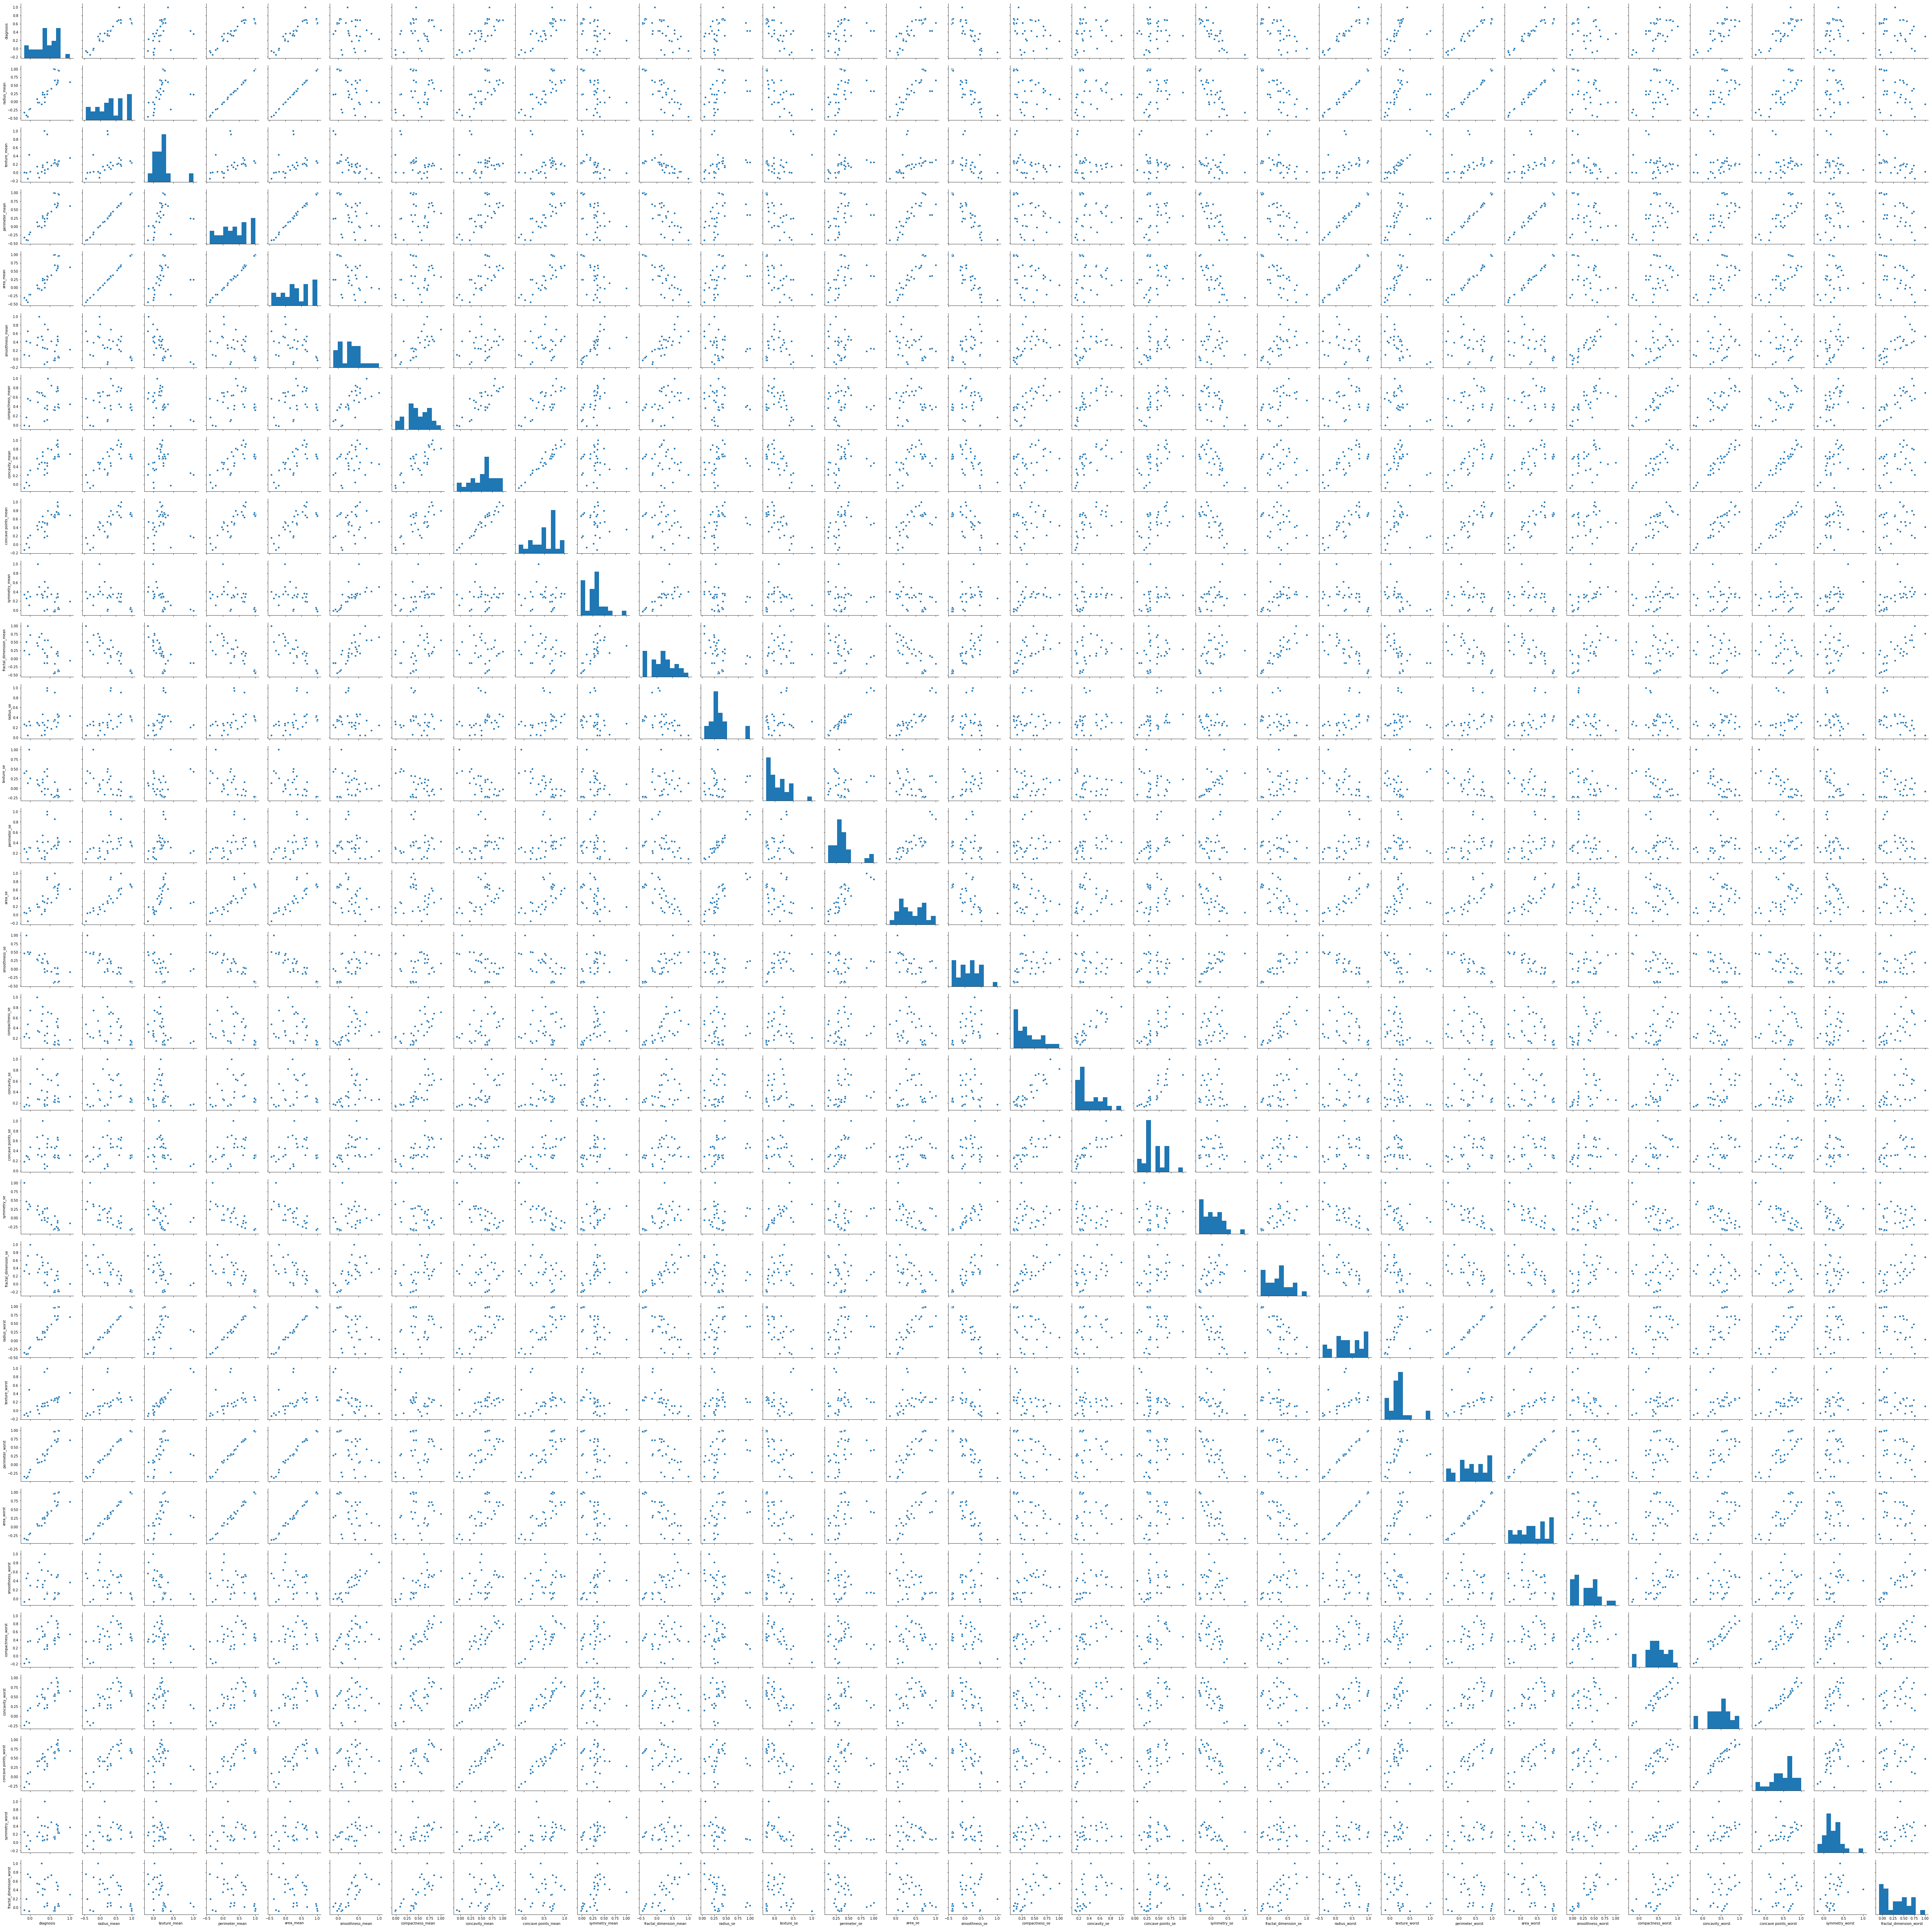

In [131]:
# Checking for the outliers using pair plot
plt.figure(figsize = (10,10))
sns.pairplot(df_cancer.corr())

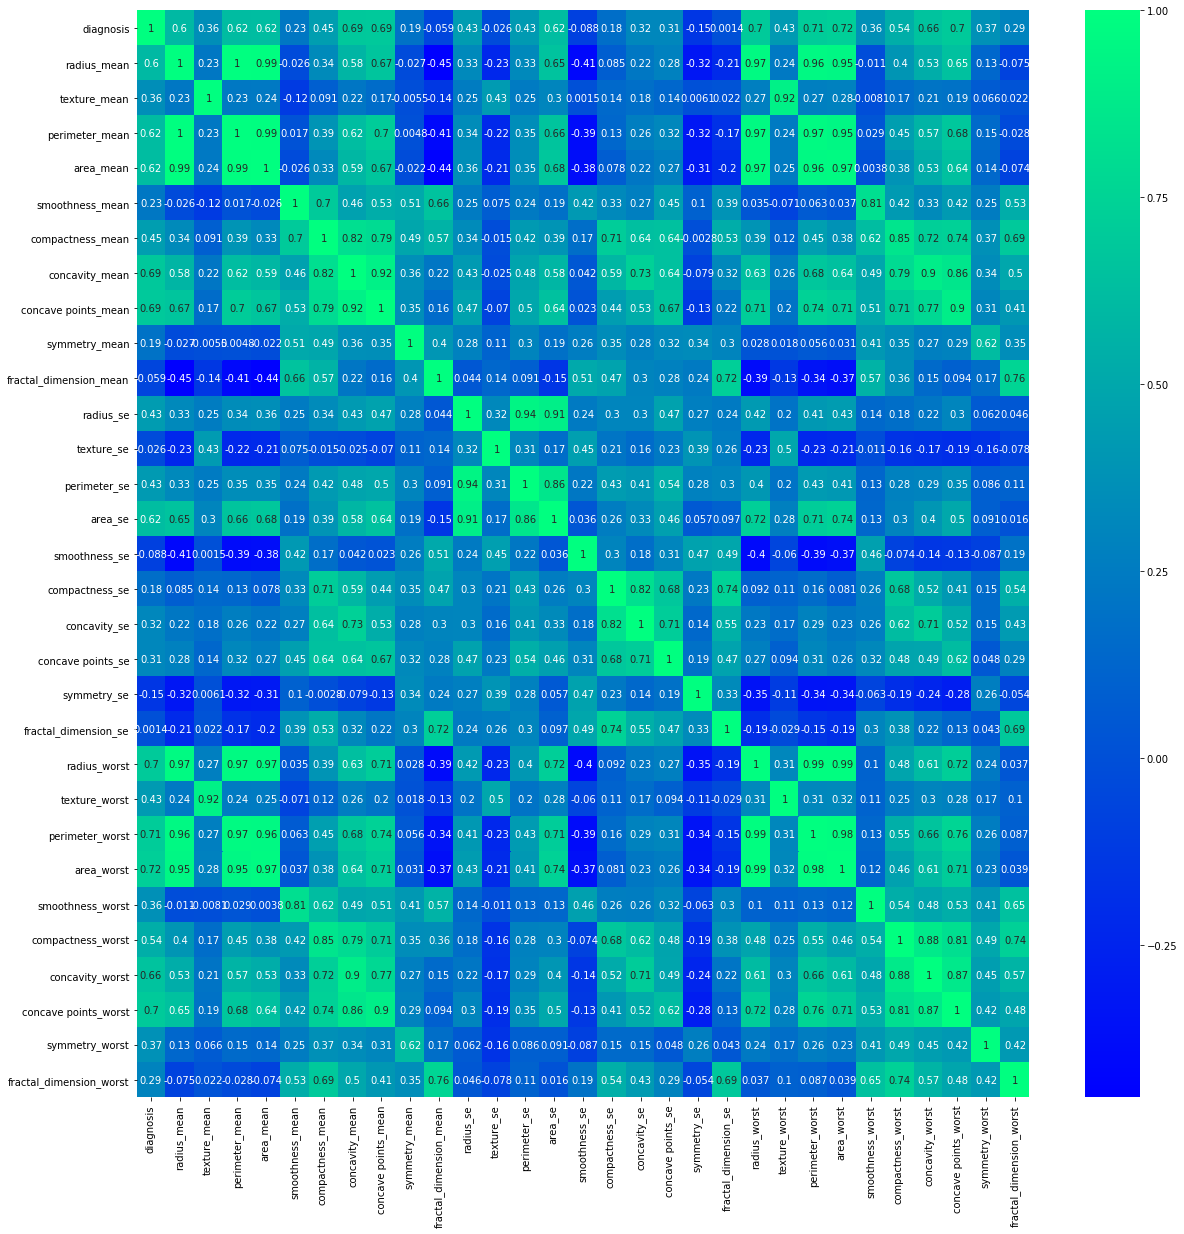

In [132]:
# Checking the correlation using heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df_cancer.corr(),annot = True,cmap='winter')

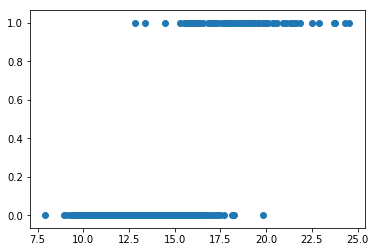

In [27]:
plt.scatter(x = 'radius_worst',y = 'diagnosis',data = df_cancer)

In [133]:
# Spliting the dependent and independent variable
y = df_cancer.pop('diagnosis')
X = df_cancer

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
# Spliting the dataset for training and testing purpose
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size= 0.7,test_size=0.3,random_state=100)

In [136]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [137]:
X_train.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [138]:
# Scaling the dataset for bringing all the columns to a single scale
X_train = pd.DataFrame(scaler.fit_transform(pd.DataFrame(X_train)))

In [139]:
X_train.columns = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

In [141]:
# Describe the dataset after standerdScaling the mean should near to 0 and the SD should be 1
X_train.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,2.770000e+02,2.770000e+02,2.770000e+02,2.770000e+02,2.770000e+02,2.770000e+02,2.770000e+02,2.770000e+02,2.770000e+02,2.770000e+02,...,2.770000e+02,2.770000e+02,2.770000e+02,2.770000e+02,2.770000e+02,2.770000e+02,2.770000e+02,2.770000e+02,2.770000e+02,2.770000e+02
mean,-8.553126e-16,4.689390e-16,-3.246501e-16,5.611236e-18,-7.771561e-16,-2.424855e-16,8.777576e-17,-1.527058e-16,1.036275e-15,4.665342e-16,...,2.517040e-16,1.362729e-17,-6.669354e-16,-1.410825e-16,-1.540585e-16,-1.282568e-17,2.024053e-16,1.474953e-16,-3.166340e-17,7.515048e-17
std,1.001810e+00,1.001810e+00,1.001810e+00,1.001810e+00,1.001810e+00,1.001810e+00,1.001810e+00,1.001810e+00,1.001810e+00,1.001810e+00,...,1.001810e+00,1.001810e+00,1.001810e+00,1.001810e+00,1.001810e+00,1.001810e+00,1.001810e+00,1.001810e+00,1.001810e+00,1.001810e+00
min,-2.716377e+00,-1.951873e+00,-2.682799e+00,-2.082164e+00,-2.446586e+00,-1.963117e+00,-1.290230e+00,-1.465137e+00,-2.616667e+00,-2.118615e+00,...,-2.380047e+00,-2.113050e+00,-2.336037e+00,-1.807487e+00,-2.307414e+00,-1.708891e+00,-1.440579e+00,-1.905005e+00,-2.177720e+00,-1.766714e+00
25%,-6.889195e-01,-7.428822e-01,-6.994247e-01,-6.980556e-01,-7.325080e-01,-7.517229e-01,-6.994714e-01,-7.006732e-01,-7.419713e-01,-6.835164e-01,...,-6.736036e-01,-7.455977e-01,-6.803801e-01,-6.849297e-01,-6.961953e-01,-7.154595e-01,-7.381377e-01,-6.867347e-01,-6.759116e-01,-7.675344e-01
50%,-8.590832e-02,-4.911542e-02,-1.098447e-01,-1.641327e-01,-1.932923e-02,-2.191807e-01,-2.955362e-01,-2.691834e-01,-4.675184e-02,-1.427034e-01,...,-1.775034e-01,-2.533646e-02,-2.022046e-01,-2.368487e-01,-5.738607e-02,-2.181517e-01,-2.164375e-01,-1.947765e-01,-1.109159e-01,-1.657207e-01
75%,6.287715e-01,6.089428e-01,6.413731e-01,5.439184e-01,6.135021e-01,6.692728e-01,4.996174e-01,6.049814e-01,7.107977e-01,5.412660e-01,...,5.648876e-01,6.688284e-01,5.930444e-01,4.546522e-01,5.956190e-01,5.751726e-01,6.491024e-01,6.010807e-01,5.600164e-01,6.174826e-01
max,3.237353e+00,3.149354e+00,3.220289e+00,3.920535e+00,3.467748e+00,3.954608e+00,3.498264e+00,3.254148e+00,3.136874e+00,5.974139e+00,...,3.390196e+00,2.953135e+00,3.404634e+00,4.201218e+00,3.340133e+00,2.679850e+00,3.167233e+00,3.327324e+00,4.259492e+00,4.622657e+00


In [142]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [143]:
# Using the automated technique for feature selection
rfe = RFE(logreg,15)
rfe = rfe.fit(X_train,y_train)

In [144]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('radius_mean', False, 5),
 ('texture_mean', True, 1),
 ('perimeter_mean', False, 8),
 ('area_mean', False, 12),
 ('smoothness_mean', False, 13),
 ('compactness_mean', True, 1),
 ('concavity_mean', True, 1),
 ('concave points_mean', True, 1),
 ('symmetry_mean', False, 14),
 ('fractal_dimension_mean', False, 7),
 ('radius_se', True, 1),
 ('texture_se', False, 9),
 ('perimeter_se', False, 3),
 ('area_se', True, 1),
 ('smoothness_se', False, 11),
 ('compactness_se', True, 1),
 ('concavity_se', False, 15),
 ('concave points_se', False, 16),
 ('symmetry_se', False, 6),
 ('fractal_dimension_se', True, 1),
 ('radius_worst', False, 4),
 ('texture_worst', False, 2),
 ('perimeter_worst', True, 1),
 ('area_worst', True, 1),
 ('smoothness_worst', True, 1),
 ('compactness_worst', False, 10),
 ('concavity_worst', True, 1),
 ('concave points_worst', True, 1),
 ('symmetry_worst', True, 1),
 ('fractal_dimension_worst', True, 1)]

In [145]:
cols = X_train.columns[rfe.support_]

In [146]:
import statsmodels.api as sm

In [149]:
#Model 1
X_train_new1 = sm.add_constant(X_train[cols])
lm1 = sm.GLM(list(y_train),X_train_new1,family = sm.families.Binomial()).fit()
print(lm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  277
Model:                            GLM   Df Residuals:                      261
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Thu, 16 May 2019   Deviance:                          nan
Time:                        12:10:05   Pearson chi2:                     23.5
No. Iterations:                   100   Covariance Type:             nonrobust
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     -11.5885      5.835     -1.986      0.047     -23.025      -0.152
texture_mean 

In [150]:
# Model 2
X_train_new2 = X_train_new1.drop('concave points_mean',axis='columns')
X_train_new2 = sm.add_constant(X_train_new2)
lm2 = sm.GLM(list(y_train),X_train_new2,family = sm.families.Binomial()).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  277
Model:                            GLM   Df Residuals:                      262
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Thu, 16 May 2019   Deviance:                          nan
Time:                        12:10:16   Pearson chi2:                     24.2
No. Iterations:                   100   Covariance Type:             nonrobust
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     -11.2581      5.557     -2.026      0.043     -22.150      -0.367
texture_mean                4.8105      2.406      1.999      0.046       0.095       9.526
compactness_mean           -6.3779      5.603     -1.138      0.255     -17.359       4.604
concavity_mean             11.9606      6.924      1.727      0.084      -1.610      25.531
radius_se                   8.1281      6.570      1.237      0.216      -4.748      21.004
area_se                    -3.6764      6.169     -0.596      0.551     -15.767       8.414
compactness_se             -3.4396      3.178     -1.082      0.279      -9.669       2.790
fractal_dimension_se      -10.3381      5.140     -2.011      0.044     -20.411      -0.265
perimeter_worst             6.8556      9.645      0.711      0.477     -12.047      25.758
area_worst                 -3.0145      7.781     -0.387      0.698     -18.265      12.236
smoothness_worst            0.7850      1.463      0.536      0.592      -2.083       3.653
concavity_worst            -3.3305      3.474     -0.959      0.338     -10.140       3.479
concave points_worst        6.6077      4.312      1.532      0.125      -1.844      15.060
symmetry_worst              1.1392      0.892      1.276      0.202      -0.610       2.888
fractal_dimension_worst     8.2118      4.623      1.776      0.076      -0.850      17.274
===========================================================================================
"""

In [151]:
# Model 3
X_train_new3 = X_train_new2.drop('area_worst',axis='columns')
X_train_new3 = sm.add_constant(X_train_new3)
lm3 = sm.GLM(list(y_train),X_train_new3,family=sm.families.Binomial()).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  277
Model:                            GLM   Df Residuals:                      263
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Thu, 16 May 2019   Deviance:                          nan
Time:                        12:10:24   Pearson chi2:                     27.2
No. Iterations:                   100   Covariance Type:             nonrobust
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     -10.4266      4.492     -2.321      0.020     -19.230      -1.623
texture_mean                4.5322      2.042      2.219      0.026       0.530       8.535
compactness_mean           -5.4832      4.683     -1.171      0.242     -14.661       3.694
concavity_mean             11.2968      6.178      1.829      0.067      -0.812      23.405
radius_se                   7.5831      5.635      1.346      0.178      -3.462      18.628
area_se                    -3.5301      5.535     -0.638      0.524     -14.379       7.319
compactness_se             -2.9991      2.938     -1.021      0.307      -8.758       2.759
fractal_dimension_se       -9.9690      4.604     -2.165      0.030     -18.993      -0.945
perimeter_worst             3.4886      3.867      0.902      0.367      -4.091      11.068
smoothness_worst            0.6717      1.379      0.487      0.626      -2.031       3.374
concavity_worst            -3.3976      3.348     -1.015      0.310      -9.959       3.164
concave points_worst        6.3427      3.898      1.627      0.104      -1.297      13.982
symmetry_worst              1.2278      0.898      1.368      0.171      -0.532       2.987
fractal_dimension_worst     7.6417      3.945      1.937      0.053      -0.089      15.373
===========================================================================================
"""

In [152]:
# Model 4
X_train_new4 = X_train_new3.drop('smoothness_worst',axis='columns')
X_train_new4 = sm.add_constant(X_train_new4)
lm4 = sm.GLM(list(y_train),X_train_new4,family=sm.families.Binomial()).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  277
Model:                            GLM   Df Residuals:                      264
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Thu, 16 May 2019   Deviance:                          nan
Time:                        12:10:33   Pearson chi2:                     25.0
No. Iterations:                   100   Covariance Type:             nonrobust
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -9.8692      3.892     -2.536      0.011     -17.497      -2.242
texture_mean                4.2034      1.702      2.470      0.014       0.868       7.539
compactness_mean           -4.4275      3.652     -1.212      0.225     -11.585       2.730
concavity_mean             10.8951      5.690      1.915      0.056      -0.256      22.046
radius_se                   6.2443      4.480      1.394      0.163      -2.536      15.024
area_se                    -1.9873      4.261     -0.466      0.641     -10.339       6.365
compactness_se             -3.4374      2.876     -1.195      0.232      -9.075       2.200
fractal_dimension_se       -9.7788      4.390     -2.228      0.026     -18.382      -1.175
perimeter_worst             2.3503      2.878      0.817      0.414      -3.291       7.992
concavity_worst            -3.1346      3.278     -0.956      0.339      -9.559       3.290
concave points_worst        5.8187      3.407      1.708      0.088      -0.860      12.497
symmetry_worst              1.3189      0.847      1.558      0.119      -0.340       2.978
fractal_dimension_worst     7.6702      3.925      1.954      0.051      -0.023      15.364
===========================================================================================
"""

In [153]:
# Model 5
X_train_new5 = X_train_new4.drop('area_se',axis='columns')
X_train_new5 = sm.add_constant(X_train_new5)
lm5 = sm.GLM(list(y_train),X_train_new5,family=sm.families.Binomial()).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  277
Model:                            GLM   Df Residuals:                      265
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Thu, 16 May 2019   Deviance:                          nan
Time:                        12:10:44   Pearson chi2:                     25.6
No. Iterations:                   100   Covariance Type:             nonrobust
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -8.9749      2.928     -3.065      0.002     -14.714      -3.236
texture_mean                3.8912      1.426      2.729      0.006       1.097       6.686
compactness_mean           -3.5051      2.881     -1.217      0.224      -9.151       2.141
concavity_mean              9.6674      4.495      2.151      0.031       0.858      18.477
radius_se                   4.4276      1.748      2.532      0.011       1.001       7.854
compactness_se             -3.1781      2.951     -1.077      0.281      -8.961       2.605
fractal_dimension_se       -9.2514      3.920     -2.360      0.018     -16.934      -1.569
perimeter_worst             1.1629      1.185      0.982      0.326      -1.159       3.485
concavity_worst            -2.7889      3.118     -0.894      0.371      -8.901       3.323
concave points_worst        5.2032      2.791      1.865      0.062      -0.266      10.673
symmetry_worst              1.4267      0.805      1.773      0.076      -0.151       3.004
fractal_dimension_worst     7.1736      3.374      2.126      0.034       0.560      13.787
===========================================================================================
"""

In [154]:
# Model 6
X_train_new6 = X_train_new5.drop('concavity_worst',axis='columns')
X_train_new6 = sm.add_constant(X_train_new6)
lm6 = sm.GLM(list(y_train),X_train_new6,family=sm.families.Binomial()).fit()
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  277
Model:                            GLM   Df Residuals:                      266
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Thu, 16 May 2019   Deviance:                          nan
Time:                        12:10:53   Pearson chi2:                     27.1
No. Iterations:                   100   Covariance Type:             nonrobust
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -9.1784      2.993     -3.066      0.002     -15.045      -3.312
texture_mean                3.9106      1.452      2.694      0.007       1.066       6.756
compactness_mean           -1.5068      1.585     -0.951      0.342      -4.614       1.600
concavity_mean              7.4137      3.190      2.324      0.020       1.161      13.666
radius_se                   4.7076      1.718      2.739      0.006       1.339       8.076
compactness_se             -4.5406      2.576     -1.763      0.078      -9.589       0.508
fractal_dimension_se       -7.8293      3.324     -2.355      0.019     -14.345      -1.314
perimeter_worst             1.1061      1.139      0.971      0.332      -1.127       3.339
concave points_worst        4.2072      2.307      1.824      0.068      -0.314       8.729
symmetry_worst              1.3913      0.814      1.709      0.088      -0.205       2.987
fractal_dimension_worst     5.6319      2.304      2.445      0.014       1.117      10.147
===========================================================================================
"""

In [155]:
# Model 7
X_train_new7 = X_train_new6.drop('compactness_mean',axis='columns')
X_train_new7 = sm.add_constant(X_train_new7)
lm7 = sm.GLM(list(y_train),X_train_new7,family=sm.families.Binomial()).fit()
lm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  277
Model:                            GLM   Df Residuals:                      267
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Thu, 16 May 2019   Deviance:                          nan
Time:                        12:11:02   Pearson chi2:                     33.2
No. Iterations:                   100   Covariance Type:             nonrobust
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -9.0835      2.915     -3.116      0.002     -14.796      -3.371
texture_mean                4.0166      1.431      2.806      0.005       1.212       6.822
concavity_mean              6.9929      2.958      2.364      0.018       1.195      12.791
radius_se                   4.7026      1.694      2.776      0.006       1.382       8.023
compactness_se             -5.2711      2.445     -2.156      0.031     -10.063      -0.479
fractal_dimension_se       -7.7001      3.311     -2.326      0.020     -14.190      -1.210
perimeter_worst             0.9790      1.064      0.920      0.358      -1.107       3.065
concave points_worst        3.6527      2.072      1.763      0.078      -0.408       7.713
symmetry_worst              1.5507      0.789      1.966      0.049       0.005       3.096
fractal_dimension_worst     5.3793      2.396      2.245      0.025       0.682      10.076
===========================================================================================
"""

In [157]:
# Model 8
X_train_new8 = X_train_new7.drop('perimeter_worst',axis='columns')
X_train_new8 = sm.add_constant(X_train_new8)
lm8 = sm.GLM(list(y_train),X_train_new8,family=sm.families.Binomial()).fit()
lm8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  277
Model:                            GLM   Df Residuals:                      268
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Thu, 16 May 2019   Deviance:                          nan
Time:                        12:11:14   Pearson chi2:                     32.6
No. Iterations:                   100   Covariance Type:             nonrobust
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     -10.1016      3.005     -3.362      0.001     -15.991      -4.212
texture_mean                4.6526      1.445      3.219      0.001       1.820       7.486
concavity_mean              8.0687      2.904      2.778      0.005       2.376      13.761
radius_se                   5.2991      1.686      3.144      0.002       1.995       8.603
compactness_se             -5.8226      2.406     -2.420      0.016     -10.539      -1.106
fractal_dimension_se       -9.0030      3.212     -2.803      0.005     -15.299      -2.707
concave points_worst        4.4931      1.873      2.399      0.016       0.822       8.164
symmetry_worst              1.8700      0.729      2.565      0.010       0.441       3.299
fractal_dimension_worst     5.7771      2.293      2.520      0.012       1.284      10.270
===========================================================================================
"""

In [158]:
# Creating fucntion to check the multicolenearity between the independent variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(df):
    vif = pd.DataFrame()
    vif['Feature'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by = 'VIF',ascending=False)
    return vif

In [159]:
calculate_vif(X_train_new8.drop('const',axis='columns'))

,Feature,VIF
1,concavity_mean,5.51
5,concave points_worst,5.10
4,fractal_dimension_se,4.95
7,fractal_dimension_worst,3.70
3,compactness_se,3.29
2,radius_se,1.47
6,symmetry_worst,1.36
0,texture_mean,1.09


In [160]:
#Model 9
X_train_new9 = X_train_new8.drop('concavity_mean',axis='columns')
X_train_new9 = sm.add_constant(X_train_new9)
lm9 = sm.GLM(list(y_train),X_train_new9,family=sm.families.Binomial()).fit()
print(lm9.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  277
Model:                            GLM   Df Residuals:                      269
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -24.127
Date:                Thu, 16 May 2019   Deviance:                       48.253
Time:                        12:12:00   Pearson chi2:                     67.0
No. Iterations:                     9   Covariance Type:             nonrobust
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -5.4128      1.121     -4.830      0.000      -7.609      -3.216
texture_mean 

In [161]:
# Model 10
X_train_new10 = X_train_new9.drop('compactness_se',axis = 'columns')
X_train_new10 = sm.add_constant(X_train_new10)
lm10 = sm.GLM(list(y_train),X_train_new10,family=sm.families.Binomial()).fit()
print(lm10.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  277
Model:                            GLM   Df Residuals:                      270
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -25.398
Date:                Thu, 16 May 2019   Deviance:                       50.797
Time:                        12:12:10   Pearson chi2:                     82.8
No. Iterations:                     9   Covariance Type:             nonrobust
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -5.3151      1.054     -5.042      0.000      -7.381      -3.249
texture_mean 

In [53]:
calculate_vif(X_train_new10.drop('const',axis=1))

,Feature,VIF
5,fractal_dimension_worst,3.51
2,fractal_dimension_se,2.72
3,concave points_worst,1.81
1,radius_se,1.39
4,symmetry_worst,1.35
0,texture_mean,1.06


In [162]:
# Model 10 is our final model based on that we will check the different metric now
y_train_pred = lm10.predict(X_train_new10)
print(y_train_pred[:10])

0    0.002113
1    0.008003
2    0.000075
3    0.027931
4    0.519369
5    0.856201
6    0.999395
7    0.032977
8    0.011357
9    0.000008
dtype: float64


In [163]:
y_train_pred = y_train_pred.values.reshape(-1)

In [164]:
# Creating data frame with actual value and predicted probability

y_train_pred_final = pd.DataFrame({'cancer':y_train, 'cancer_prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index

In [165]:
y_train_pred_final.head()

,cancer,cancer_prob,ID
102,0,0.002113,102
491,0,0.008003,491
51,0,0.000075,51
143,0,0.027931,143
514,1,0.519369,514


In [166]:
y_train_pred_final['predicted'] = y_train_pred_final.cancer_prob.map(lambda x : 1 if x>0.5 else 0)

In [167]:
y_train_pred_final.head()

,cancer,cancer_prob,ID,predicted
102,0,0.002113,102,0
491,0,0.008003,491,0
51,0,0.000075,51,0
143,0,0.027931,143,0
514,1,0.519369,514,1


In [168]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train_pred_final.cancer,y_train_pred_final.predicted)
print(confusion)

[[208   7]
 [  6  56]]


In [169]:
# Predicted     not_cancer  cancer
# Actual
# not_cancer        208       7
# cancer            6       56  

In [170]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train_pred_final.cancer,y_train_pred_final.predicted))

0.9530685920577617


In [171]:
TP = confusion[1,1]
TN = confusion[0,0]
FN = confusion[1,0]
FP = confusion[0,1]

In [172]:
# sensitivity
print(TP/float(TP+FN))

0.9032258064516129


In [173]:
#specificity
print(TN/float(TN+FP))

0.9674418604651163


In [174]:
# False positive rate
print(FP/float(FP+TN))


0.03255813953488372


In [175]:
from sklearn.metrics import roc_curve,roc_auc_score

In [176]:
def draw_roc(actual,prob):
    fpr,tpr,thresholds = roc_curve(actual,prob,drop_intermediate=True)
    accuracy_score = roc_auc_score(actual,prob)
    plt.figure(figsize=(5,5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)'  %accuracy_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    return None

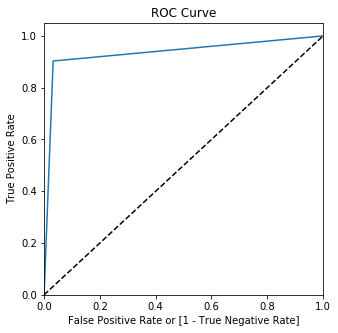

In [177]:
draw_roc(y_train_pred_final.cancer,y_train_pred_final.predicted)

In [178]:
# Checking for the more accurate cutoff value
numbers = [float(x/10) for x in range(10)]

for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.cancer_prob.map(lambda x : 1 if x>i else 0)
y_train_pred_final.head()

,cancer,cancer_prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
102,0,0.002113,102,0,1,0,0,0,0,0,0,0,0,0
491,0,0.008003,491,0,1,0,0,0,0,0,0,0,0,0
51,0,0.000075,51,0,1,0,0,0,0,0,0,0,0,0
143,0,0.027931,143,0,1,0,0,0,0,0,0,0,0,0
514,1,0.519369,514,1,1,1,1,1,1,1,0,0,0,0


In [179]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.cancer, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.223827  1.000000  0.000000
0.1   0.1  0.931408  0.967742  0.920930
0.2   0.2  0.953069  0.967742  0.948837
0.3   0.3  0.949458  0.935484  0.953488
0.4   0.4  0.956679  0.935484  0.962791
0.5   0.5  0.953069  0.903226  0.967442
0.6   0.6  0.960289  0.870968  0.986047
0.7   0.7  0.953069  0.822581  0.990698
0.8   0.8  0.953069  0.790323  1.000000
0.9   0.9  0.945848  0.758065  1.000000


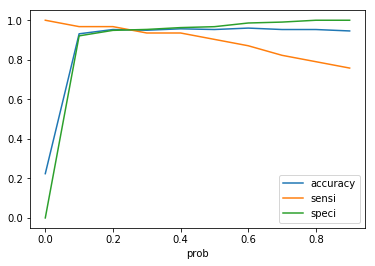

In [180]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [181]:
y_train_pred_final['final_predicted'] = y_train_pred_final.cancer_prob.map( lambda x: 1 if x > 0.2 else 0)
y_train_pred_final.head()

,cancer,cancer_prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
102,0,0.002113,102,0,1,0,0,0,0,0,0,0,0,0,0
491,0,0.008003,491,0,1,0,0,0,0,0,0,0,0,0,0
51,0,0.000075,51,0,1,0,0,0,0,0,0,0,0,0,0
143,0,0.027931,143,0,1,0,0,0,0,0,0,0,0,0,0
514,1,0.519369,514,1,1,1,1,1,1,1,0,0,0,0,1


In [182]:
accuracy_score(y_train_pred_final.cancer,y_train_pred_final.final_predicted)

0.9530685920577617

In [183]:
confusion = confusion_matrix(y_train_pred_final.cancer,y_train_pred_final.final_predicted)
confusion

array([[204,  11],
       [  2,  60]], dtype=int64)

In [184]:
TP = confusion[1,1]
TN = confusion[0,0]
FN = confusion[1,0]
FP = confusion[0,1]

In [185]:
#Sensitivity
print(TP/float(TP + FN))

0.967741935483871


In [186]:
#Specificity
print(TN/float(TN+FP))

0.9488372093023256


In [187]:
X_train_new10.columns

Index(['const', 'texture_mean', 'radius_se', 'fractal_dimension_se',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [196]:
# Now we will make prediction on the test data
X_test = pd.DataFrame(scaler.transform(pd.DataFrame(X_test)))
X_test.columns = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

In [200]:
cols = X_train_new10.columns[X_train_new10.columns !='const']

In [203]:
X_test = X_test[cols]

In [204]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = lm10.predict(X_test_sm)

In [207]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [213]:
y_pred_1.head(5)

,0
0,2.087067e-05
1,9.160789e-01
2,7.098974e-06
3,1.117857e-01
4,2.870753e-08


In [214]:
y_test_df = pd.DataFrame(y_test)

In [215]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [216]:
y_pred_final = pd.concat([y_test_df,y_pred_1],axis='columns')

In [218]:
y_pred_final.columns = ['cancer','pred_prob']

In [220]:
y_pred_final['Prediction'] = y_pred_final.pred_prob.map(lambda x : 1 if x>0.2 else 0)

In [221]:
y_pred_final.head()

,cancer,pred_prob,Prediction
0,0,2.087067e-05,0
1,0,9.160789e-01,1
2,0,7.098974e-06,0
3,0,1.117857e-01,0
4,0,2.870753e-08,0


In [222]:
accuracy_score(y_pred_final.cancer,y_pred_final.Prediction)

0.907563025210084

In [224]:
confusion = confusion_matrix(y_pred_final.cancer,y_pred_final.Prediction)
confusion

array([[90,  9],
       [ 2, 18]], dtype=int64)

In [231]:
TP = confusion[1,1]
TN = confusion[0,0]
FN = confusion[1,0]
FP = confusion[0,1]
print(TP,TN,FP,FN)

18 90 9 2


In [230]:
# Sensitivity
print(TP/float(TP+FN))

0.9


In [232]:
# Specificity
print(TN/float(TN+FP))

0.9090909090909091
